# Stationarity and Detrending

In this project, I created a Python notebook for applying techniques to de-trend non-stationary time-series data and making it ready and used as input for a learning algorithm like ARIMA or machine learning model. 


## Goal:

The goal of this notebook is to de-trend the series using various detrending techniques. Output os the de-trend series maybe used as input for a machine learning algorithm.


## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- De-trend by Manual differencing

- De-trend by Auto differencing

- De-trend by Model fitting

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

### Import Libraries

In [1]:
#import packages
import numpy as np
import pandas as pd
import os

import sklearn.preprocessing as preproc
from statsmodels.tsa.stattools import adfuller

#Import statsmodel
import statsmodels.api as sm

#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

### Load Data

In [4]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
data = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')

In [6]:
#make a copy
df = data.copy()

In [7]:
x = df[['Revenue']]

#### Distribution

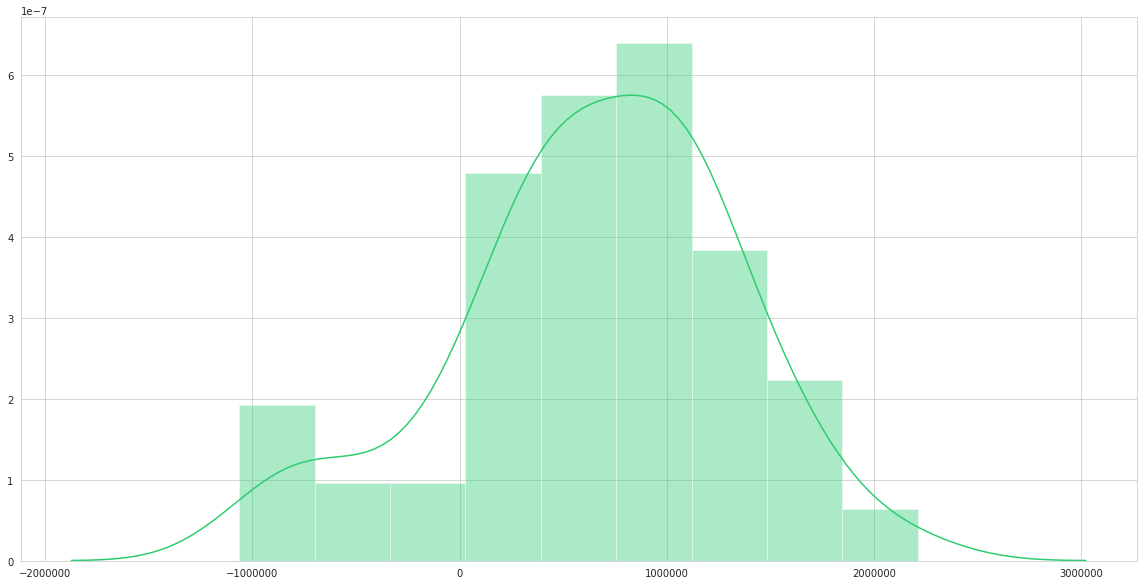

In [8]:
#plot the distribution
ax=sns.distplot(x, color='#2ecc71')

- The distribution is not Gaussian.
- The shape has a long left-tail and may suggest an exponential distribution

#### Appy Power Transform - Yeo_Johnson 

In [9]:
modeler = preproc.PowerTransformer(method='yeo-johnson')
modeler.fit(x)
df['rvn_transformed'] = modeler.fit_transform(x)
x_yeo= df[['rvn_transformed']]

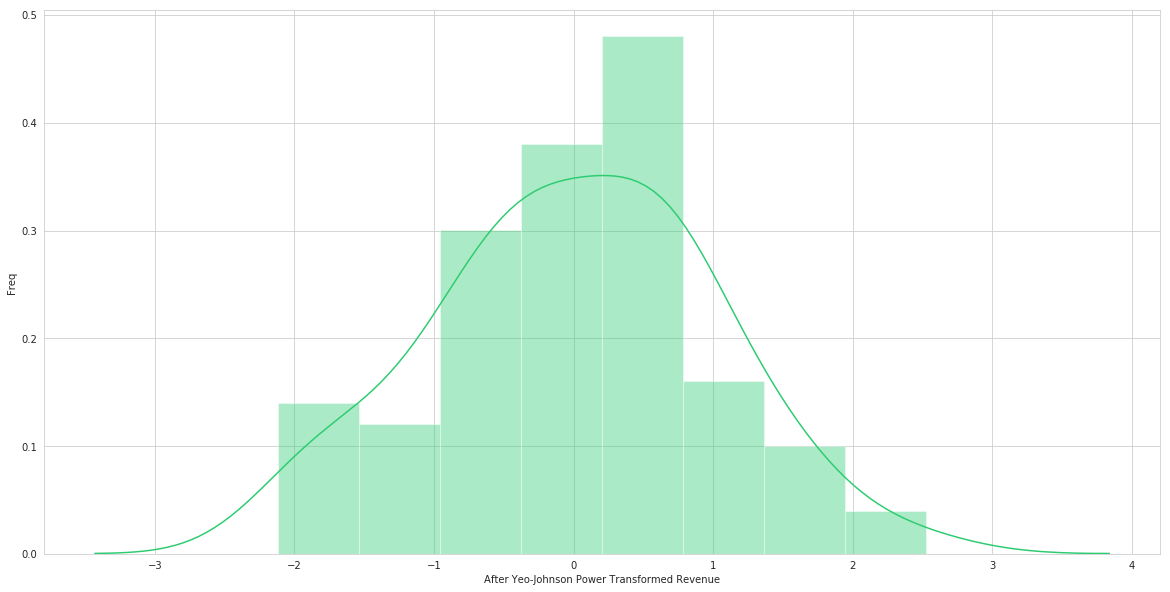

In [10]:
#plot the distribution
ax=sns.distplot(x_yeo, color='#2ecc71')
ax.tick_params(labelsize=10)
ax.set_xlabel('After Yeo-Johnson Power Transformed Revenue', fontsize=10)
ax.set_ylabel('Freq', fontsize=10)
plt.show()

- We now have a Gaussian distribution after `Yeo-Johnson` transformed.

### Trends

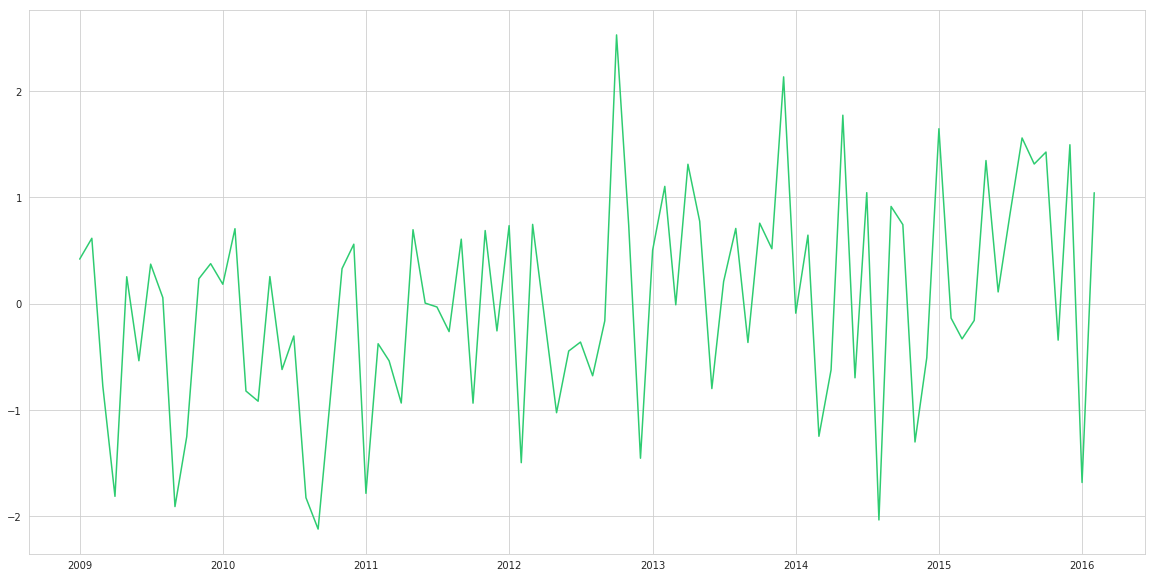

In [11]:
# plot
plt.plot(x_yeo, color='#2ecc71')
plt.show()

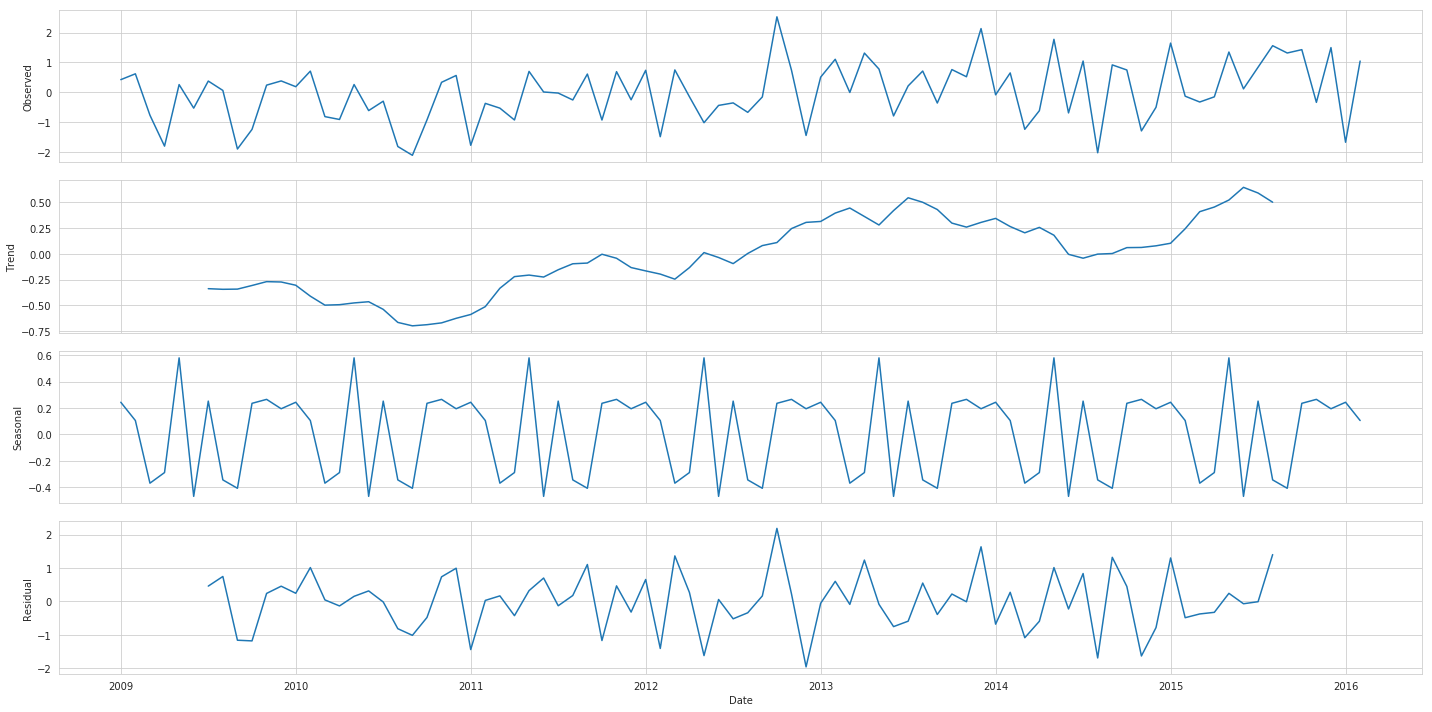

In [12]:
# Use decoposition to check for trend and seasonality
decomposition = sm.tsa.seasonal_decompose(x_yeo, model='additive')
fig = decomposition.plot()
plt.show()

- We can observed a deterministic upward trend

- No seasonality since its cycles are aperiodic but we need to handle the trend.

#### Detrend using Manual Differencing

- Used to remove temporal dependence like trends and seasonality.

In [13]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [14]:
# invert difference
def invert_difference(orig_data, diff_data, interval):
    orig = list()
    for i in range(interval, len(orig_data)):
        value = diff_data[i-interval] + orig_data[i-interval]
        orig.append(value)
    return pd.Series(orig)

In [15]:
X = x_yeo.rvn_transformed.values
X = X.astype('float32')

In [16]:
# difference data
months_in_year = 12
lag_diff = difference(X, months_in_year)
lag_diff.index = x_yeo.index[months_in_year:]

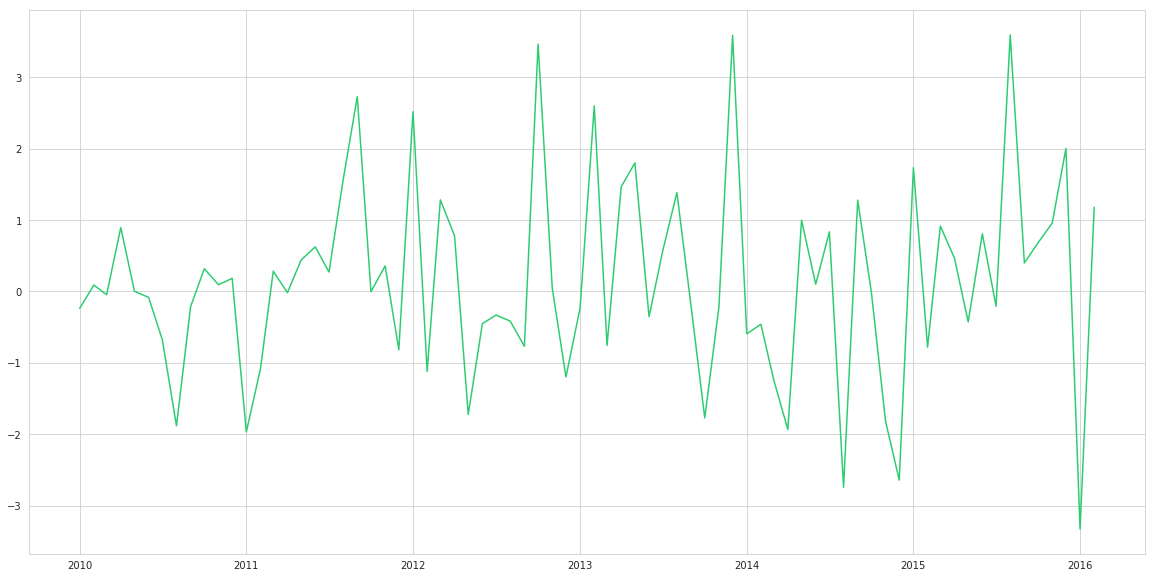

In [17]:
# plot
plt.plot(lag_diff, color='#2ecc71')
plt.show()

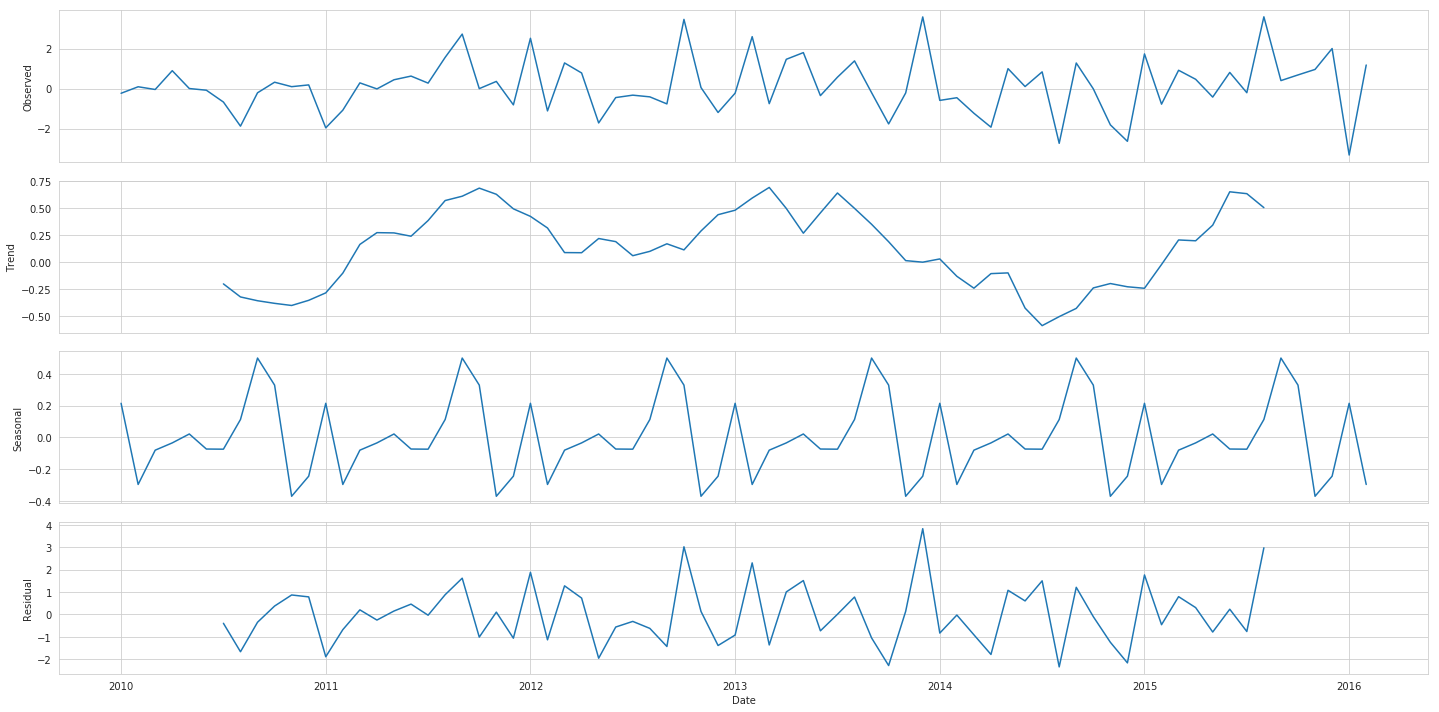

In [18]:
# Use decoposition to check for trend and seasonality
decomposition_lag = sm.tsa.seasonal_decompose(lag_diff, model='additive')
fig = decomposition_lag.plot()
plt.show()

- After detrend, the upward-trend is stabilized horizontally and so are some of the seasonality.

#### Detrend using Auto-Differencing

In [53]:
#Period 1 is to remove trend
diff = x_yeo.diff(periods=1)
diff = diff[1:]

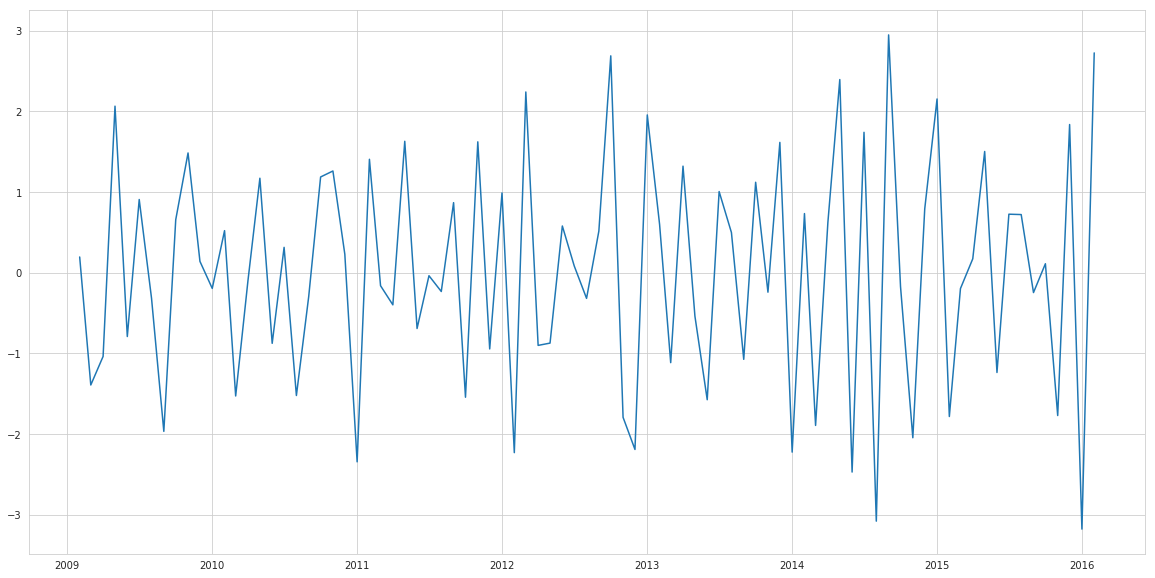

In [54]:
#plot the trend
#plt.plot(y)
plt.plot(diff)
plt.show()

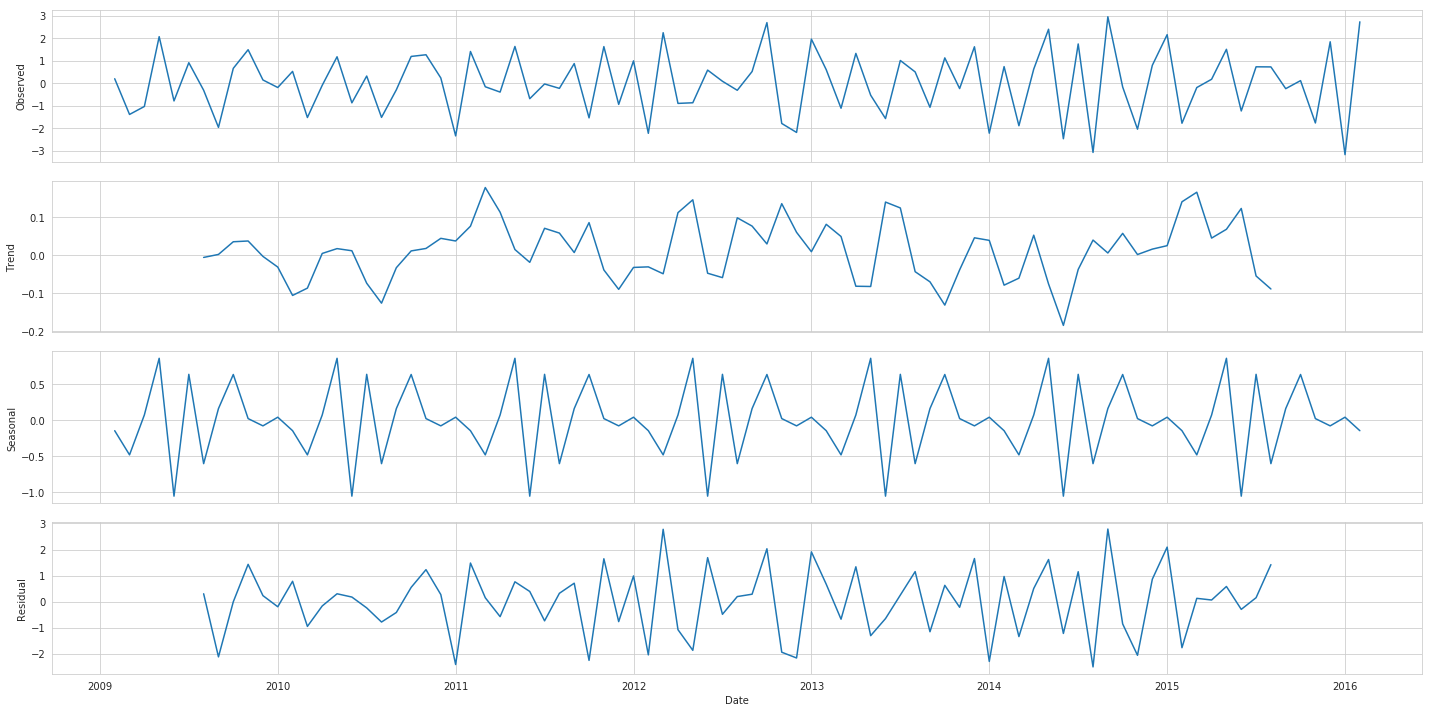

In [55]:
# Use decoposition to check for trend and seasonality
decomposition_diff = sm.tsa.seasonal_decompose(diff, model='additive')
fig = decomposition_diff.plot()
plt.show()

#### Detrend by Model Fitting

In [19]:
X = [i for i in range(0, len(x_yeo))]

In [20]:
X = np.reshape(X, (len(X), 1))
y = x_yeo.values

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#fit the linear
mdl = LinearRegression()
mdl.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#calculate the trend
trend = mdl.predict(X)

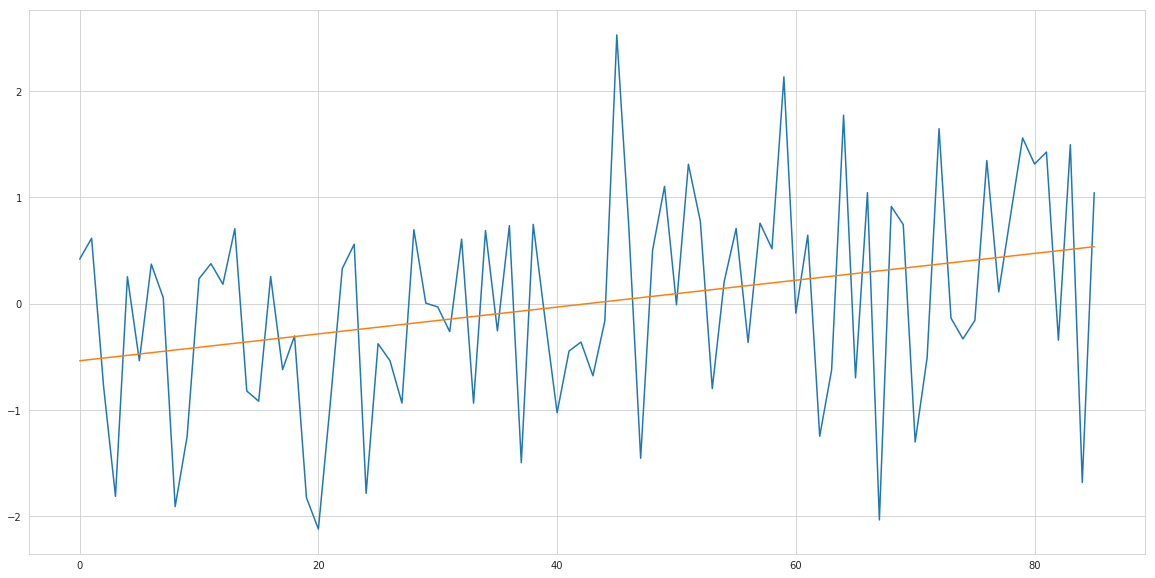

In [24]:
#plot the trend
plt.plot(y)
plt.plot(trend)
plt.show()

In [25]:
#detrend
detrended = [y[i]-trend[i] for i in range(0, len(x_yeo))]

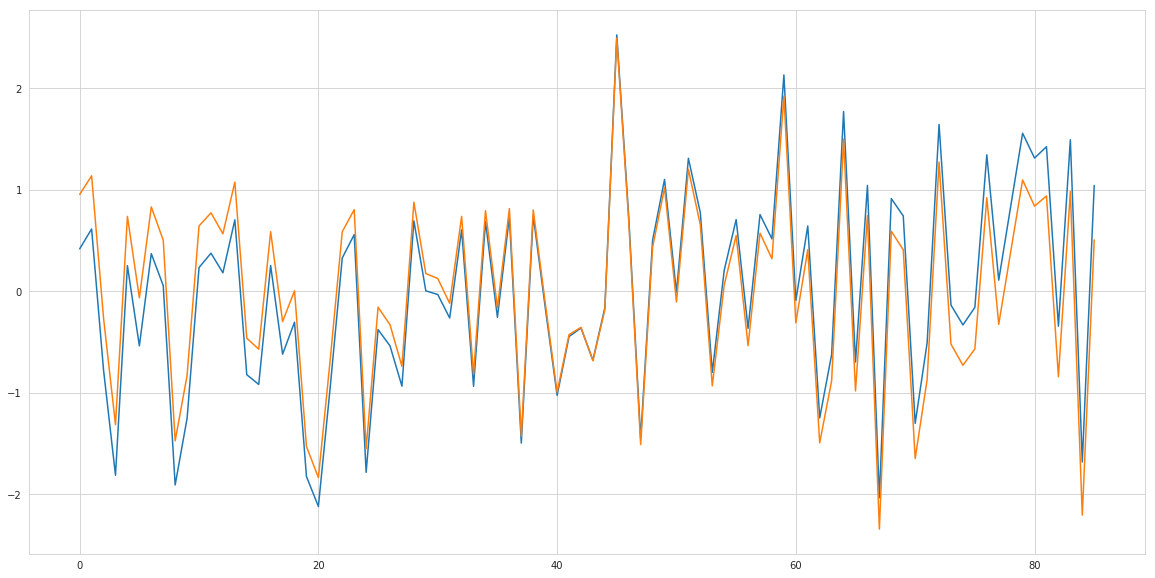

In [26]:
#plot the detrend
plt.plot(y)
plt.plot(detrended)
plt.show()